# Data Science Assignment

## Binary Classification

### Arunava Kumar Chakraborty

In this assignment, the machine learning-based approach for binary classification has been presented. In order to execute the analysis, the following datasets have been used - 
1. **training_set.csv** - Contains 3910 records, 57 features, 1 output
2. **test_set.csv** (without Ground Truth) - Contains 691 records, 57 features

In this experiment, the datasets will be per-processed to clean the noise. Then the relevant features will be executed based on the linear relationships between them. Different baseline machine learning models will be developed to perform the classification task based on the selected features. Finally, the best-performing model will be selected to predict the target value for the test dataset by analyzing the feature set.

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Load Datasets

In [2]:
train_df = pd.read_csv("training_set.csv")
print(train_df.shape)
train_df.head()

(3910, 59)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [3]:
test_df = pd.read_csv("test_set.csv")
print(test_df.shape)
test_df.head()

(691, 58)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


## 3. Data Pre-processing

### 3.1. Rename the unnamed column

In [4]:
train_df.rename(columns = {'Unnamed: 0':'X0'}, inplace = True)
test_df.rename(columns = {'Unnamed: 0':'X0'}, inplace = True)

### 3.2. Missing Values Removal

In [5]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

X0     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64
X0     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50   

### 3.3. Outliers Removal

In [6]:
def cap_data(df):
    print("Capping the columns...")
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    print("Outliers have been removed from the dataset.")
    return df

In [7]:
final_train_df=cap_data(train_df)

Capping the columns...
Outliers have been removed from the dataset.


In [8]:
final_test_df=cap_data(test_df)

Capping the columns...
Outliers have been removed from the dataset.


In [9]:
final_train_df.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.0,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.094790,0.117538,0.277143,0.0,0.296614,0.091211,0.104094,0.093073,0.087898,...,0.025769,0.131904,0.012660,0.238767,0.068272,0.025548,3.494997,46.924041,272.787366,0.392327
std,1128.178944,0.236788,0.374532,0.464072,0.0,0.557566,0.227973,0.316409,0.274856,0.249599,...,0.088990,0.186973,0.044342,0.443160,0.157335,0.097150,4.451228,103.076506,481.828826,0.488331
min,39.090000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.0,0.387500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,3869.910000,1.240000,2.654600,2.338200,0.0,2.940000,1.199100,1.958200,1.619100,1.380000,...,0.635820,0.974200,0.272000,2.635550,0.893460,0.744250,36.535710,669.000000,3032.640000,1.000000


In [10]:
final_test_df.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,...,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,345.000000,0.107135,0.184051,0.248507,0.001586,0.294362,0.084250,0.114543,0.079333,0.074255,...,0.017232,0.027223,0.133028,0.011339,0.229482,0.061281,0.033187,3.900000,48.505065,262.094356
std,199.483756,0.298599,0.873747,0.438241,0.014669,0.576221,0.225934,0.324825,0.241799,0.218740,...,0.098775,0.095837,0.199625,0.045517,0.393269,0.150077,0.127022,6.717888,106.784469,441.280252
min,6.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
25%,172.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606000,6.000000,34.500000
50%,345.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.055000,0.000000,0.004000,0.000000,0.000000,2.285000,15.000000,99.000000
75%,517.500000,0.000000,0.000000,0.360000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.189000,0.000000,0.307500,0.038000,0.000000,3.676500,46.000000,271.500000
max,683.100000,2.000000,7.737000,2.044000,0.138000,3.072000,1.271000,1.717000,1.457000,1.150000,...,0.771000,0.678900,1.102800,0.308000,1.965600,0.839300,0.906900,58.618400,669.000000,2714.600000


In [11]:
final_train_df = final_train_df.drop(['X4'], axis=1)

In [12]:
final_test_df = final_test_df.drop(['X4'], axis=1)

## 4. Feature Extraction

### 4.1. Correlation Analysis [Train Data]

In [13]:
final_train_corr = final_train_df.corr()
final_train_corr

,X0,X1,X2,X3,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
X0,1.000000,-0.016705,-0.033855,-0.002329,-0.030498,0.018237,0.001412,0.042227,-0.002121,0.011627,...,-0.000302,-0.007145,0.017205,0.001564,-0.000132,-0.005769,-0.019396,-0.007831,-0.000066,0.002330
X1,-0.016705,1.000000,-0.001568,0.116165,0.054253,0.100786,0.018938,0.033412,0.160962,0.081107,...,-0.037411,-0.020927,-0.061313,0.148906,0.204216,0.019238,0.091214,0.141652,0.166766,0.177260
X2,-0.033855,-0.001568,1.000000,0.034410,0.053193,0.011972,0.107122,0.028756,0.080253,0.193241,...,-0.006877,-0.048151,-0.038694,0.051165,0.071954,0.030480,0.128219,0.115491,0.053385,0.099121
X3,-0.002329,0.116165,0.034410,1.000000,0.100792,0.126784,0.065174,0.046839,0.116102,0.056939,...,-0.030390,-0.013052,-0.054990,0.219535,0.145588,-0.009878,0.132210,0.188564,0.100764,0.228015
X5,-0.030498,0.054253,0.053193,0.100792,1.000000,0.101622,0.199748,0.069341,0.036451,0.071629,...,-0.029862,-0.052960,-0.040003,0.092554,0.090205,-0.001594,0.117585,0.110856,0.027660,0.289670
X6,0.018237,0.100786,0.011972,0.126784,0.101622,1.000000,0.107996,0.159460,0.173889,0.035406,...,-0.017924,-0.023980,-0.038573,0.130268,0.160663,0.042171,0.058071,0.212791,0.128892,0.286635
X7,0.001412,0.018938,0.107122,0.065174,0.199748,0.107996,1.000000,0.080920,0.064998,0.089728,...,-0.062282,-0.067935,-0.049805,0.131744,0.112484,0.053159,0.234976,0.138412,0.004210,0.373191
X8,0.042227,0.033412,0.028756,0.046839,0.069341,0.159460,0.080920,1.000000,0.154976,0.152868,...,-0.047630,-0.034781,-0.026769,0.115355,0.137035,-0.009938,0.140127,0.126754,0.103751,0.278878
X9,-0.002121,0.160962,0.080253,0.116102,0.036451,0.173889,0.064998,0.154976,1.000000,0.183500,...,0.005481,-0.030821,0.075249,0.120666,0.247360,0.033030,0.263559,0.363233,0.361454,0.268219
X10,0.011627,0.081107,0.193241,0.056939,0.071629,0.035406,0.089728,0.152868,0.183500,1.000000,...,0.022956,0.031530,0.055619,0.119414,0.124604,0.064789,0.276866,0.233277,0.155347,0.184963


### 4.2. Feature Selection

In [14]:
cor_target = abs(final_train_corr["Y"])

relevant_train_features = cor_target[cor_target>0.25]
relevant_train_features

X5     0.289670
X6     0.286635
X7     0.373191
X8     0.278878
X9     0.268219
X11    0.289076
X16    0.370326
X17    0.294420
X19    0.303368
X21    0.427993
X23    0.377067
X24    0.372233
X25    0.290484
X26    0.264277
X52    0.431593
X53    0.446723
X55    0.332283
X56    0.350290
X57    0.305049
Y      1.000000
Name: Y, dtype: float64

In [15]:
final_train_data = final_train_df[['X5', 'X6', 'X7', 'X8', 'X9', 'X11',
                              'X16', 'X17', 'X19', 'X21', 'X23', 'X24',
                              'X25', 'X26', 'X52', 'X53', 'X55', 'X56',
                              'X57', 'Y']]
final_train_data.head()

,X5,X6,X7,X8,X9,X11,X16,X17,X19,X21,X23,X24,X25,X26,X52,X53,X55,X56,X57,Y
0,0.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.342,0.000,1.200,2,12.0,0
1,1.12,0.56,1.9582,0.00,0.0,0.0,0.00,0.00,3.38,1.12,0.00,0.00,0.0,0.0,0.503,0.000,16.304,148,375.0,1
2,0.00,0.00,0.0000,0.00,0.0,0.0,0.00,0.00,7.31,0.00,0.00,0.00,0.0,0.0,0.000,0.000,1.000,1,5.0,0
3,1.93,0.00,0.0000,0.00,0.0,0.0,1.29,0.64,1.93,2.58,0.64,0.00,0.0,0.0,0.462,0.370,2.440,22,122.0,1
4,0.58,0.00,0.5800,0.58,0.0,0.0,0.58,0.58,0.58,1.74,0.00,1.16,0.0,0.0,0.239,0.239,3.338,123,207.0,1


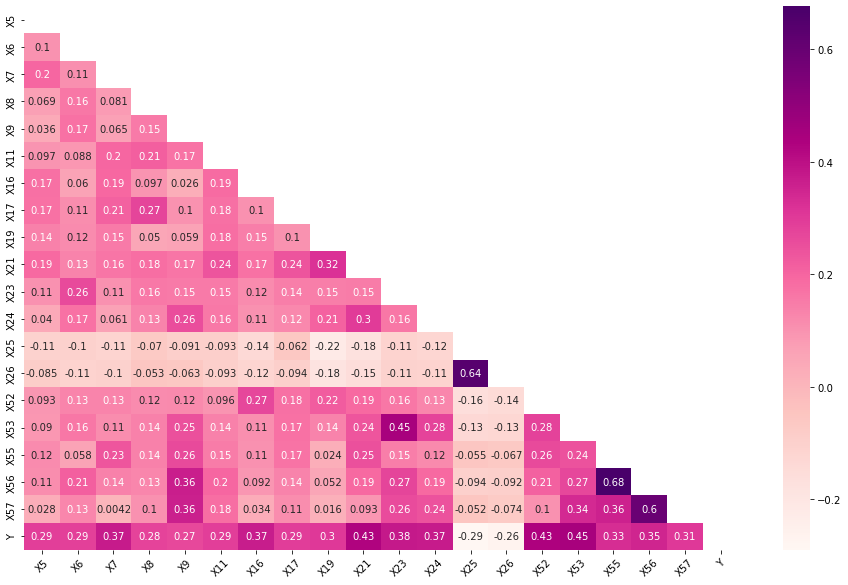

In [16]:
final_train_corr = final_train_data.corr()
mask = np.triu(np.ones_like(final_train_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(final_train_corr,annot=True, mask = mask, cmap=plt.cm.RdPu)
plt.xticks(rotation=45)
plt.show()

In [17]:
final_test_data = final_test_df[['X5', 'X6', 'X7', 'X8', 'X9', 'X11',
                              'X16', 'X17', 'X19', 'X21', 'X23', 'X24',
                              'X25', 'X26', 'X52', 'X53', 'X55', 'X56',
                              'X57']]
final_test_data.head()

,X5,X6,X7,X8,X9,X11,X16,X17,X19,X21,X23,X24,X25,X26,X52,X53,X55,X56,X57
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.00,0.00,0.00,0.0,0.0,0.105,0.000,2.342,47,89.0
1,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,1.69,0.00,0.84,0.0,0.0,0.776,0.129,10.375,168,249.0
2,0.05,0.12,0.05,0.28,0.43,0.25,0.25,0.43,3.22,1.46,1.05,0.36,0.0,0.0,0.325,0.756,5.891,193,2714.6
3,0.80,0.80,0.50,0.00,0.80,0.30,0.10,0.00,1.31,0.70,0.60,0.10,0.0,0.0,0.490,0.158,8.550,669,1351.0
4,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,1.45,0.00,0.72,0.0,0.0,0.729,0.121,7.781,32,249.0


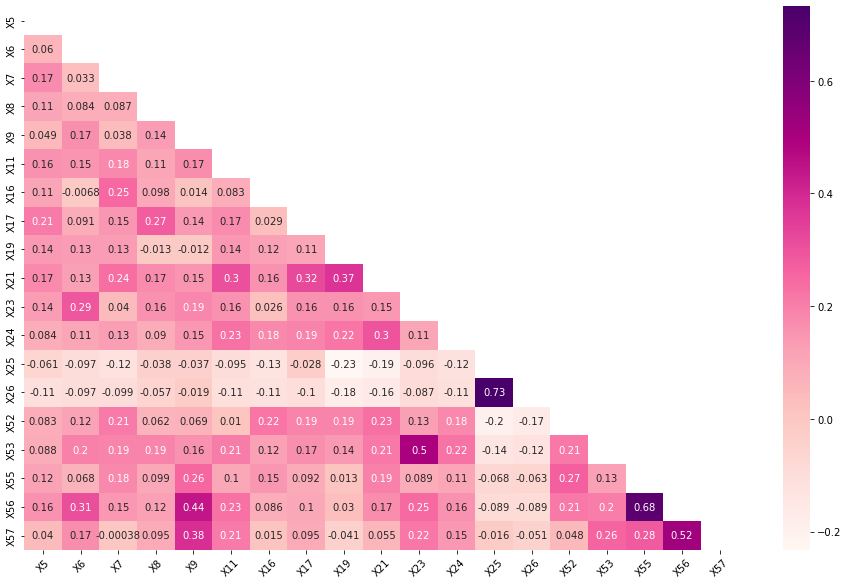

In [18]:
final_test_corr = final_test_data.corr()
mask = np.triu(np.ones_like(final_test_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(final_test_corr,annot=True, mask = mask, cmap=plt.cm.RdPu)
plt.xticks(rotation=45)
plt.show()

## 5. Predictive Analysis [Classification Models]

### 5.1. Train-Val-Test Split

In [19]:
X = final_train_data.drop(['Y'], axis=1)
y = final_train_data['Y']

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=10)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(2932, 19) (978, 19) (2932,) (978,)


In [21]:
X_test = final_test_data
print(X_test.shape)

(691, 19)


### 5.2. Classification Models

#### 5.2.1. Logistic Regression Model

In [22]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
log_reg_model_score = log_reg_model.score(X_val, y_val)
log_reg_model_accuracy = round(log_reg_model_score*100, 2)
print("The classification accuracy of Logistic Regression model is "+ str(log_reg_model_accuracy)+"%")

The classification accuracy of Logistic Regression model is 89.37%


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

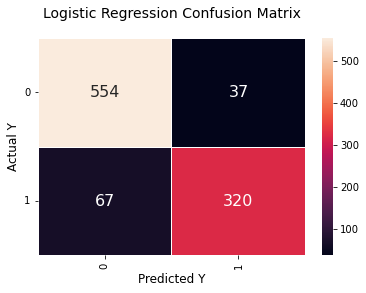

In [24]:
y_pred = log_reg_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['0', '1']

axes.set_xlabel('Predicted Y', fontsize=12)
axes.set_ylabel('Actual Y', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=90)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

In [25]:
print('Logistic Regression Classification Report')
print('=========================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       591
           1       0.90      0.83      0.86       387

    accuracy                           0.89       978
   macro avg       0.89      0.88      0.89       978
weighted avg       0.89      0.89      0.89       978



In [26]:
log_reg_model.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

#### 5.2.2. KNN Classification Model

In [27]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
knn_model_score = knn_model.score(X_val, y_val)
knn_model_accuracy = round(knn_model_score*100, 2)
print("The classification accuracy of KNN model is "+ str(knn_model_accuracy)+"%")

The classification accuracy of KNN model is 78.02%


Text(0.5, 1.0, 'KNN Confusion Matrix')

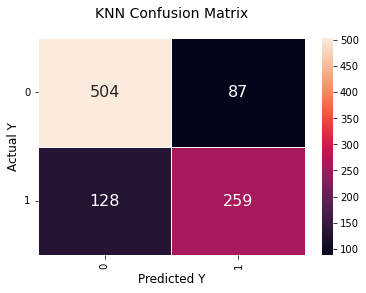

In [29]:
y_pred = knn_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['0', '1']

axes.set_xlabel('Predicted Y', fontsize=12)
axes.set_ylabel('Actual Y', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=90)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('KNN Confusion Matrix', fontsize=14, pad=20)

In [30]:
print('KNN Classification Report')
print('=========================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

KNN Classification Report

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       591
           1       0.75      0.67      0.71       387

    accuracy                           0.78       978
   macro avg       0.77      0.76      0.77       978
weighted avg       0.78      0.78      0.78       978



In [31]:
knn_model.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

#### 5.2.3 Decision Tree Regression Model

In [32]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
dtree_model_score = dtree_model.score(X_val, y_val)
dtree_model_accuracy = round(dtree_model_score*100, 2)
print("The classification accuracy of Decision Tree model is "+ str(dtree_model_accuracy)+"%")

The classification accuracy of Decision Tree model is 87.93%


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

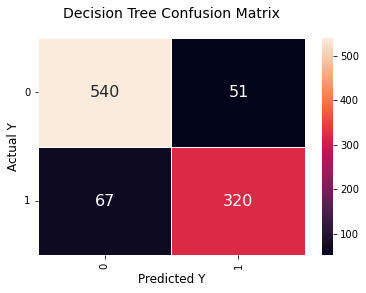

In [34]:
y_pred = dtree_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['0', '1']

axes.set_xlabel('Predicted Y', fontsize=12)
axes.set_ylabel('Actual Y', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=90)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Decision Tree Confusion Matrix', fontsize=14, pad=20)

In [35]:
print('Decision Tree Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       591
           1       0.86      0.83      0.84       387

    accuracy                           0.88       978
   macro avg       0.88      0.87      0.87       978
weighted avg       0.88      0.88      0.88       978



In [36]:
dtree_model.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

#### 5.2.4 AdaBoost Regression Model

In [37]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier()

In [38]:
adaboost_model_score = adaboost_model.score(X_val, y_val)
adaboost_model_accuracy = round(adaboost_model_score*100, 2)
print("The classification accuracy of AdaBoost model is "+ str(adaboost_model_accuracy)+"%")

The classification accuracy of AdaBoost model is 93.15%


Text(0.5, 1.0, 'AdaBoost Confusion Matrix')

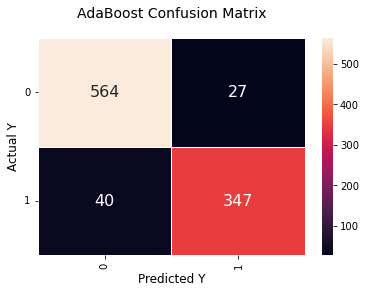

In [39]:
y_pred = adaboost_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['0', '1']

axes.set_xlabel('Predicted Y', fontsize=12)
axes.set_ylabel('Actual Y', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=90)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('AdaBoost Confusion Matrix', fontsize=14, pad=20)

In [40]:
print('AdaBoost Classification Report')
print('==============================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

AdaBoost Classification Report

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       591
           1       0.93      0.90      0.91       387

    accuracy                           0.93       978
   macro avg       0.93      0.93      0.93       978
weighted avg       0.93      0.93      0.93       978



In [41]:
adaboost_model.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

#### 5.2.5 Random Forest Classification Model

In [42]:
rforest_model = RandomForestClassifier()
rforest_model.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
rforest_model_score = rforest_model.score(X_val, y_val)
rforest_model_accuracy = round(rforest_model_score*100, 2)
print("The classification accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

The classification accuracy of Random Forest model is 94.48%


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

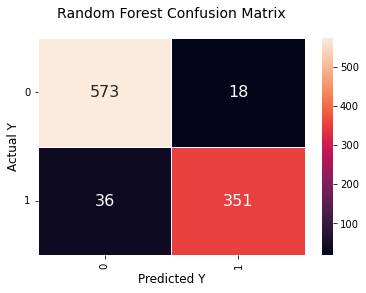

In [44]:
y_pred = rforest_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['0', '1']

axes.set_xlabel('Predicted Y', fontsize=12)
axes.set_ylabel('Actual Y', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=90)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

In [45]:
print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       591
           1       0.95      0.91      0.93       387

    accuracy                           0.94       978
   macro avg       0.95      0.94      0.94       978
weighted avg       0.94      0.94      0.94       978



In [46]:
rforest_model.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

**Analysis**

During the analysis, it has been found that the **Random Forest** classifier outperforms all other machine learning classifiers and achieved **94.48%** validation accuracy for binary classification on the validation dataset. So the **Y** values of the test dataset will be predicted using **Random Forest** classifier for future analysis.

In [47]:
y_test_pred = rforest_model.predict(X_test)
final_test_data['Y_pred'] = ""
final_test_data['Y_pred'] = y_test_pred.tolist()
final_test_data.head()

,X5,X6,X7,X8,X9,X11,X16,X17,X19,X21,X23,X24,X25,X26,X52,X53,X55,X56,X57,Y_pred
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.00,0.00,0.00,0.0,0.0,0.105,0.000,2.342,47,89.0,0
1,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,1.69,0.00,0.84,0.0,0.0,0.776,0.129,10.375,168,249.0,1
2,0.05,0.12,0.05,0.28,0.43,0.25,0.25,0.43,3.22,1.46,1.05,0.36,0.0,0.0,0.325,0.756,5.891,193,2714.6,1
3,0.80,0.80,0.50,0.00,0.80,0.30,0.10,0.00,1.31,0.70,0.60,0.10,0.0,0.0,0.490,0.158,8.550,669,1351.0,1
4,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,1.45,0.00,0.72,0.0,0.0,0.729,0.121,7.781,32,249.0,1


**Future Scope**

In the future, the feature selection method can be improved for better performance of these machine learning models. In order to achieve better classification accuracy, these machine learning models can be improved by finding the best parameters during the training phase.